In [109]:
from importlib import reload
import pathlib
import os
import sys
import pickle
from pprint import pprint
import numba

In [2]:
this_path = pathlib.Path('.').parent.absolute()
src_path = os.path.join(this_path, '..')
sys.path.insert(0, src_path)

In [3]:
import dnashapeparams as dsp
import find_motifs as fm
import numpy as np
import inout

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [110]:
params = [
    "test/BRCA1_input/BRCA1_30_bp_height_train_4.fa.EP",
    "test/BRCA1_input/BRCA1_30_bp_height_train_4.fa.HelT",
    "test/BRCA1_input/BRCA1_30_bp_height_train_4.fa.MGW",
    "test/BRCA1_input/BRCA1_30_bp_height_train_4.fa.ProT",
    "test/BRCA1_input/BRCA1_30_bp_height_train_4.fa.Roll",
]
param_names = [
    "EP",
    "HelT",
    "MGW",
    "ProT",
    "Roll",
]
this_dist = inout.constrained_manhattan_distance
search_method = "brute"
in_file = "test/BRCA1_input/BRCA1_30_bp_height_train_4.txt"
kmer = 15
ignorestart = 2
ignoreend = 2
threshold_perc = 0.05
thresh_sd_from_mean = 2.0
threshold_seeds = 2.0
threshold_match = 2.0
seeds_per_seq_thresh = 1
seeds_per_seq = 2
num_seeds = 5000
rc = False

In [112]:
with open('test_subset_optim.pkl', 'rb') as f:
    optims = pickle.load(f)

In [7]:
optims[-1]

{'hits': array([0., 0., 0., ..., 1., 0., 0.]),
 'mi': 0.4304585699404754,
 'weights': array([[ 1.23013990e-05,  2.02479294e-05,  1.05769988e-05,
          3.35789543e-05,  6.69762003e-06],
        [ 5.70959949e-03,  5.72030194e-03,  5.75266166e-03,
          5.73702527e-03,  5.75266166e-03],
        [ 1.05664530e-02,  1.05467589e-02,  1.05906716e-02,
          1.06202985e-02,  1.04966636e-02],
        [ 1.45326211e-02,  1.44847398e-02,  1.46029104e-02,
          1.45378905e-02,  1.45069125e-02],
        [ 1.67982418e-02,  1.75147744e-02,  1.76364732e-02,
          1.75928597e-02,  1.76347884e-02],
        [ 1.99130596e-02,  1.96929798e-02,  1.97678203e-02,
          1.98351950e-02,  1.97433251e-02],
        [ 2.10498924e-02,  2.10397233e-02,  2.10290119e-02,
          2.11797839e-02,  2.11748554e-02],
        [ 2.14240455e-02,  2.15121430e-02,  2.14030501e-02,
          2.16124196e-02,  2.15759938e-02],
        [ 2.12405969e-02,  2.11409794e-02,  2.12405969e-02,
          2.12405969e-0

In [8]:
[k for k in optims[0].keys()]

['hits',
 'mi',
 'weights',
 'threshold',
 'motif',
 'mi_orig',
 'orig_weights',
 'orig_threshold',
 'r_idx',
 'w_idx',
 'opt_success',
 'opt_message',
 'opt_info']

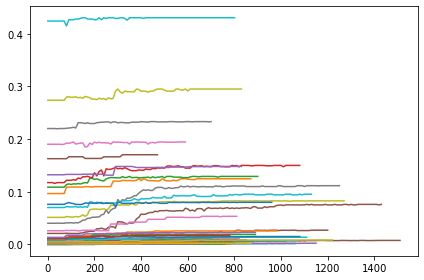

In [9]:
rownum = 1
colnum = 1

fig,ax = plt.subplots(nrows=rownum, ncols=colnum)

rec_list = []
win_list = []
eval_list = []
mi_list = []
diff_list = []

for i,optim_res in enumerate(optims):
    
    mi_trace = optim_res['opt_info']['value']
    nfeval = optim_res['opt_info']['eval']
    ax.plot(
        nfeval,
        mi_trace
    )
    
plt.tight_layout()

In [10]:
top_mi = optims[-1]

In [11]:
top_mi['orig_weights']

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00571429, 0.00571429, 0.00571429, 0.00571429, 0.00571429],
       [0.01054945, 0.01054945, 0.01054945, 0.01054945, 0.01054945],
       [0.01450549, 0.01450549, 0.01450549, 0.01450549, 0.01450549],
       [0.01758242, 0.01758242, 0.01758242, 0.01758242, 0.01758242],
       [0.01978022, 0.01978022, 0.01978022, 0.01978022, 0.01978022],
       [0.0210989 , 0.0210989 , 0.0210989 , 0.0210989 , 0.0210989 ],
       [0.02153846, 0.02153846, 0.02153846, 0.02153846, 0.02153846],
       [0.0210989 , 0.0210989 , 0.0210989 , 0.0210989 , 0.0210989 ],
       [0.01978022, 0.01978022, 0.01978022, 0.01978022, 0.01978022],
       [0.01758242, 0.01758242, 0.01758242, 0.01758242, 0.01758242],
       [0.01450549, 0.01450549, 0.01450549, 0.01450549, 0.01450549],
       [0.01054945, 0.01054945, 0.01054945, 0.01054945, 0.01054945],
       [0.00571429, 0.00571429, 0.00571429, 0.00571429, 0.00571429],
       [0.        , 0.        , 0.

In [12]:
top_mi['weights']

array([[ 1.23013990e-05,  2.02479294e-05,  1.05769988e-05,
         3.35789543e-05,  6.69762003e-06],
       [ 5.70959949e-03,  5.72030194e-03,  5.75266166e-03,
         5.73702527e-03,  5.75266166e-03],
       [ 1.05664530e-02,  1.05467589e-02,  1.05906716e-02,
         1.06202985e-02,  1.04966636e-02],
       [ 1.45326211e-02,  1.44847398e-02,  1.46029104e-02,
         1.45378905e-02,  1.45069125e-02],
       [ 1.67982418e-02,  1.75147744e-02,  1.76364732e-02,
         1.75928597e-02,  1.76347884e-02],
       [ 1.99130596e-02,  1.96929798e-02,  1.97678203e-02,
         1.98351950e-02,  1.97433251e-02],
       [ 2.10498924e-02,  2.10397233e-02,  2.10290119e-02,
         2.11797839e-02,  2.11748554e-02],
       [ 2.14240455e-02,  2.15121430e-02,  2.14030501e-02,
         2.16124196e-02,  2.15759938e-02],
       [ 2.12405969e-02,  2.11409794e-02,  2.12405969e-02,
         2.12405969e-02,  2.11781836e-02],
       [ 1.97980974e-02,  1.97855100e-02,  1.98498051e-02,
         1.97787086e-02

In [13]:
top_mi['weights'] - top_mi['orig_weights']

array([[ 1.23013990e-05,  2.02479294e-05,  1.05769988e-05,
         3.35789543e-05,  6.69762003e-06],
       [-4.68622150e-06,  6.01622524e-06,  3.83759478e-05,
         2.27395577e-05,  3.83759478e-05],
       [ 1.70024999e-05, -2.69161152e-06,  4.12210591e-05,
         7.08479036e-05, -5.27869646e-05],
       [ 2.71265519e-05, -2.07547549e-05,  9.74158675e-05,
         3.23959696e-05,  1.41803230e-06],
       [-7.84175800e-04, -6.76431555e-05,  5.40556260e-05,
         1.04421268e-05,  5.23707782e-05],
       [ 1.32839819e-04, -8.72400004e-05, -1.23994499e-05,
         5.49752644e-05, -3.68946776e-05],
       [-4.90086580e-05, -5.91778019e-05, -6.98892063e-05,
         8.08828107e-05,  7.59543336e-05],
       [-1.14416049e-04, -2.63185517e-05, -1.35411401e-04,
         7.39580772e-05,  3.75322673e-05],
       [ 1.41695807e-04,  4.20783157e-05,  1.41695807e-04,
         1.41695807e-04,  7.92824687e-05],
       [ 1.78776470e-05,  5.29024807e-06,  6.95852764e-05,
        -1.51121798e-06

In [14]:
with open('test_subset_optim_min_mi_0.2.pkl', 'rb') as f:
    optims_min_mi = pickle.load(f)

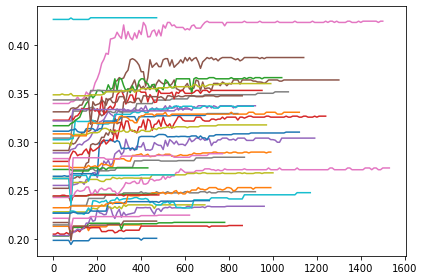

In [15]:
rownum = 1
colnum = 1

fig,ax = plt.subplots(nrows=rownum, ncols=colnum)

for i,optim_res in enumerate(optims_min_mi):
    
    mi_trace = optim_res['opt_info']['value']
    nfeval = optim_res['opt_info']['eval']
    ax.plot(
        nfeval,
        mi_trace
    )
    
plt.tight_layout()

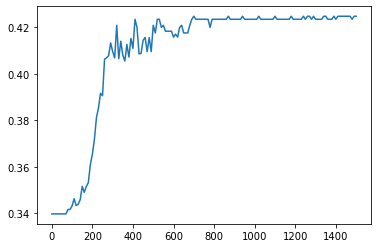

In [16]:
plt.plot(
    optims_min_mi[-4]['opt_info']['eval'],
    optims_min_mi[-4]['opt_info']['value']
)

In [17]:
opt_of_interest = optims_min_mi[-4]
opt_of_interest['weights'] - opt_of_interest['orig_weights']

array([[-4.56422224e-05,  2.40787229e-05,  3.13977609e-05,
         1.62276528e-05, -1.78656138e-05],
       [ 4.31213271e-05, -1.48393697e-05, -2.05997391e-05,
         5.02512464e-05,  4.86573290e-05],
       [ 1.14335935e-04,  8.43256594e-05,  2.77268444e-05,
         7.69959020e-05,  2.96134405e-04],
       [ 1.46163045e-04,  1.12381339e-04,  8.28728968e-05,
         1.03139464e-04,  6.98591913e-05],
       [ 2.86504748e-04, -9.01356692e-05,  7.59586312e-05,
         1.10641137e-04,  7.98782863e-05],
       [-9.49133591e-05,  1.40088404e-04, -8.75701418e-05,
        -1.57069555e-04, -5.87457842e-05],
       [-2.19732666e-04, -3.25443935e-05, -5.73944974e-05,
         1.59387401e-04,  8.63977709e-05],
       [-6.97901864e-05, -1.23496833e-04, -1.74029744e-04,
        -1.39655790e-04, -1.60102896e-04],
       [ 1.78708104e-04,  7.35002911e-05,  1.25546298e-04,
         1.29222922e-04,  1.13356728e-04],
       [ 9.63471966e-05,  7.90726934e-05,  1.18088695e-04,
        -5.93594256e-05

In [18]:
opt_of_interest['weights'].shape

(15, 5)

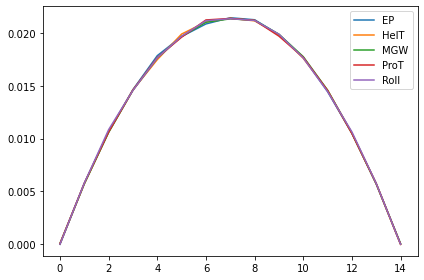

In [19]:
for shape_idx in range(opt_of_interest['weights'].shape[1]):
    these_vals = opt_of_interest['weights'][:,shape_idx]
    name = param_names[shape_idx]
    plt.plot(
        [i for i in range(opt_of_interest['weights'].shape[0])],
        these_vals,
        label = name
    )
plt.legend()
plt.tight_layout();

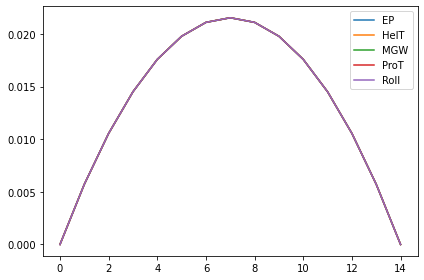

In [20]:
for shape_idx in range(opt_of_interest['orig_weights'].shape[1]):
    these_vals = opt_of_interest['orig_weights'][:,shape_idx]
    name = param_names[shape_idx]
    plt.plot(
        [i for i in range(opt_of_interest['orig_weights'].shape[0])],
        these_vals,
        label = name
    )
plt.legend()
plt.tight_layout();

In [21]:
opt_of_interest['threshold']

0.7138704152906371

In [22]:
opt_of_interest['orig_threshold']

0.7776323932289332

In [23]:
with open('test_subset_optim_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    optims_flat_init_min_mi = pickle.load(f)

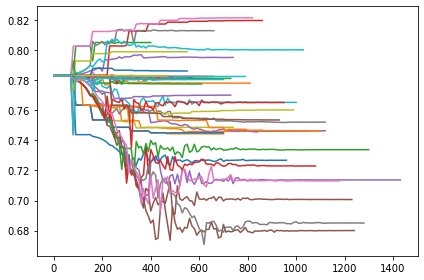

In [24]:
rownum = 1
colnum = 1

fig,ax = plt.subplots(nrows=rownum, ncols=colnum)

for i,optim_res in enumerate(optims_flat_init_min_mi):
    
    thresh_trace = optim_res['opt_info']['threshold']
    nfeval = optim_res['opt_info']['eval']
    ax.plot(
        nfeval,
        thresh_trace
    )
    
plt.tight_layout()

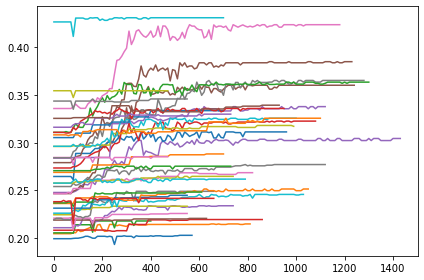

In [25]:
rownum = 1
colnum = 1

fig,ax = plt.subplots(nrows=rownum, ncols=colnum)

for i,optim_res in enumerate(optims_flat_init_min_mi):
    
    mi_trace = optim_res['opt_info']['value']
    nfeval = optim_res['opt_info']['eval']
    ax.plot(
        nfeval,
        mi_trace
    )
    
plt.tight_layout()

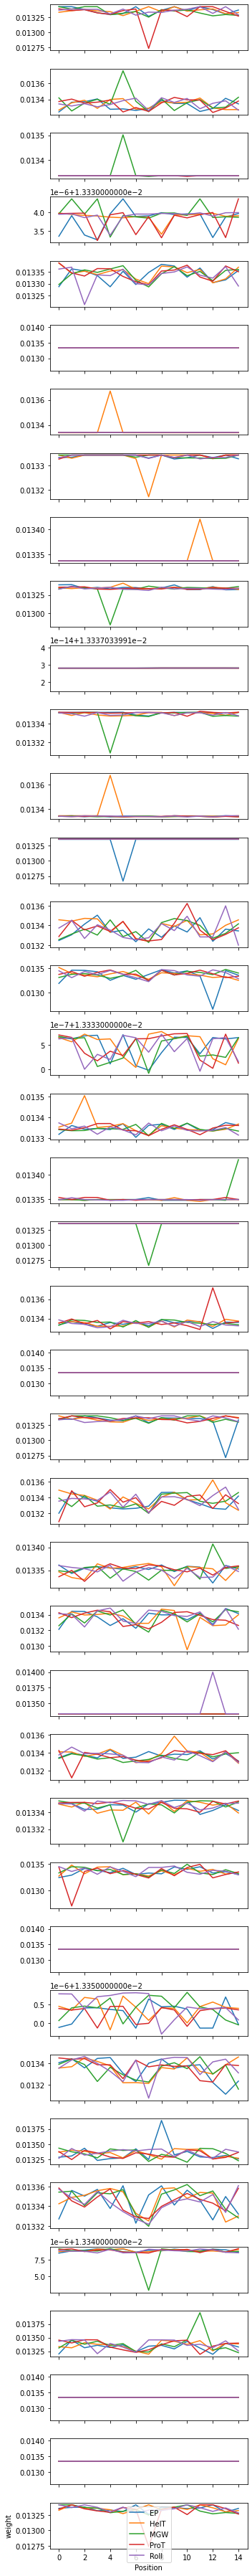

In [26]:
fig,ax = plt.subplots(nrows=len(optims_flat_init_min_mi), sharex=True, figsize=(5,50))

for i,motif in enumerate(optims_flat_init_min_mi):
    for shape_idx in range(motif['weights'].shape[1]):
        these_vals = motif['weights'][:,shape_idx]
        name = param_names[shape_idx]
        ax[i].plot(
            [i for i in range(motif['weights'].shape[0])],
            these_vals,
            label = name
        )
plt.legend()
plt.ylabel("weight")
plt.xlabel("Position")
plt.tight_layout();

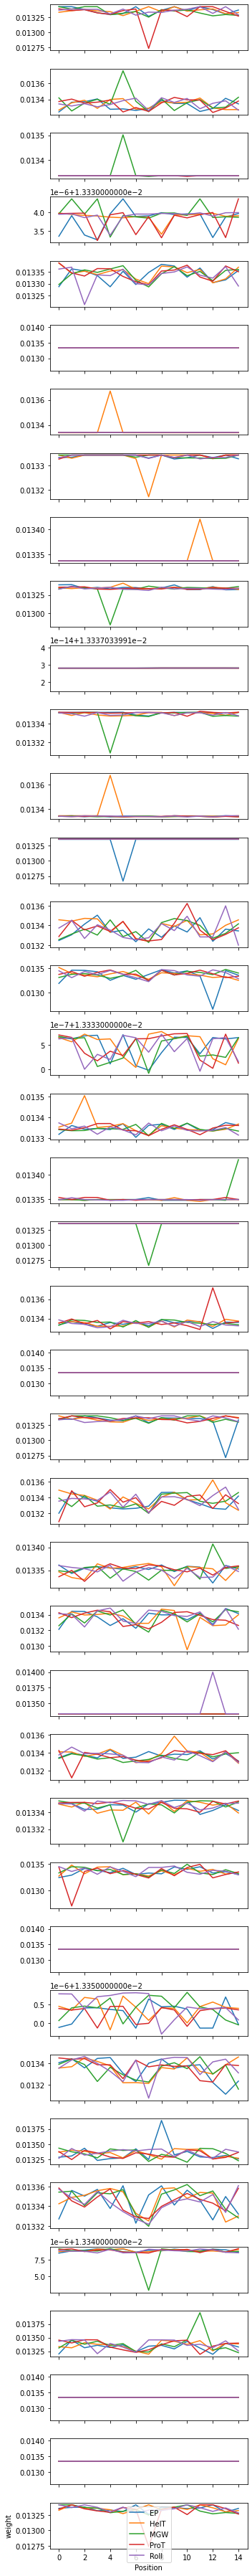

In [27]:
fig,ax = plt.subplots(nrows=len(optims_flat_init_min_mi), sharex=True, figsize=(5,50))

for i,motif in enumerate(optims_flat_init_min_mi):
    for shape_idx in range(motif['weights'].shape[1]):
        these_vals = motif['weights'][:,shape_idx]
        name = param_names[shape_idx]
        ax[i].plot(
            [i for i in range(motif['weights'].shape[0])],
            these_vals,
            label = name
        )
plt.legend()
plt.ylabel("weight")
plt.xlabel("Position")
plt.tight_layout();

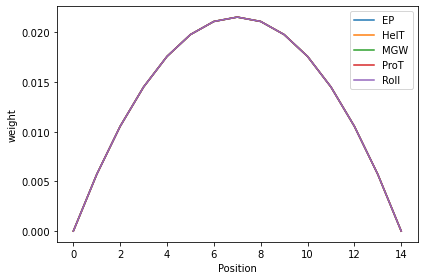

In [28]:
for shape_idx in range(opt_of_interest['orig_weights'].shape[1]):
    these_vals = opt_of_interest['orig_weights'][:,shape_idx]
    name = param_names[shape_idx]
    plt.plot(
        [i for i in range(opt_of_interest['orig_weights'].shape[0])],
        these_vals,
        label = name
    )
plt.legend()
plt.ylabel("weight")
plt.xlabel("Position")
plt.tight_layout();

In [29]:
with open('test_subset_optim_shapes_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    shapes_optim = pickle.load(f)

In [30]:
with open('adapt_test_subset_optim_shapes_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    adapt_shapes_optim = pickle.load(f)

In [31]:
with open('test_subset_optim_weights_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    weights_optim = pickle.load(f)

In [32]:
with open('adapt_test_subset_optim_weights_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    adapt_weights_optim = pickle.load(f)

In [33]:
with open('test_subset_optim_weights_shapes_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    weights_shapes_optim = pickle.load(f)

In [34]:
with open('test_subset_optim_weights_shapes_threshold_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    weights_shapes_thresh_optim = pickle.load(f)

In [35]:
with open('adapt_test_subset_optim_weights_shapes_threshold_flat_init_w_min_mi_0.2.pkl', 'rb') as f:
    adapt_weights_shapes_thresh_optim = pickle.load(f)

In [36]:
with open('stochastic_opt_weights_adapt_False_fatol_0.001_temp_0.2_stepsize_0.5_min_mi_0.7.pkl', 'rb') as f:
    stochastic_weights_optim = pickle.load(f)

In [95]:
with open('brent_stochastic_opt_weights_adapt_False_fatol_0.01_temp_0.5_stepsize_0.5_min_mi_0.7.pkl', 'rb') as f:
    brent_stochastic_weights_optim = pickle.load(f)

In [97]:
with open('brent_stochastic_opt_shapes_weights_adapt_False_fatol_0.01_temp_0.5_stepsize_0.5_min_mi_0.7.pkl', 'rb') as f:
    brent_stochastic_weights_shapes_optim = pickle.load(f)

In [98]:
with open('brent_stochastic_opt_shapes_adapt_False_fatol_0.01_temp_0.5_stepsize_0.5_min_mi_0.7.pkl', 'rb') as f:
    brent_stochastic_shapes_optim = pickle.load(f)

In [99]:
optim_dict = {
    'shapes': shapes_optim,
    'adapt shapes': adapt_shapes_optim,
    'weights': weights_optim,
    'adapt weights': adapt_weights_optim,
    'shapes and weights': weights_shapes_optim,
    'shapes weights and threshold': weights_shapes_thresh_optim,
    'adapt shapes weights and threshold': adapt_weights_shapes_thresh_optim,
    'stochastic weights': stochastic_weights_optim,
    'brent stochastic weights': brent_stochastic_weights_optim,
    'brent stochastic shapes': brent_stochastic_shapes_optim,
    'brent stochastic weights shapes': brent_stochastic_weights_shapes_optim,
}

In [100]:
print(len(brent_stochastic_shapes_optim))
print(len(brent_stochastic_shapes_optim[0]))

2
3


In [101]:
brent_stochastic_shapes_optim[0][2]

7

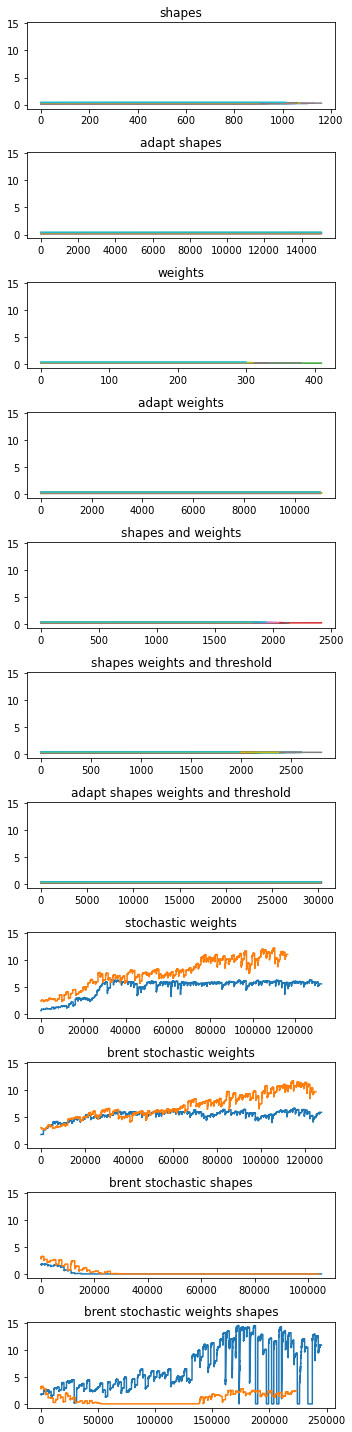

In [102]:
rownum = len(optim_dict)
colnum = 1

fig,ax = plt.subplots(nrows=rownum, ncols=colnum, figsize=(5,20), sharex=False, sharey=True)

for i,(param,optims) in enumerate(optim_dict.items()):
    
    for optim_res in optims:

        if 'brent' in param:
            mi_trace = optim_res[0]['opt_info']['value']
            nfeval = optim_res[0]['opt_info']['eval']
        else:
            mi_trace = optim_res['opt_info']['value']
            nfeval = optim_res['opt_info']['eval']
        ax[i].plot(
            nfeval,
            mi_trace
        )
    ax[i].set_title(param)

    plt.tight_layout()

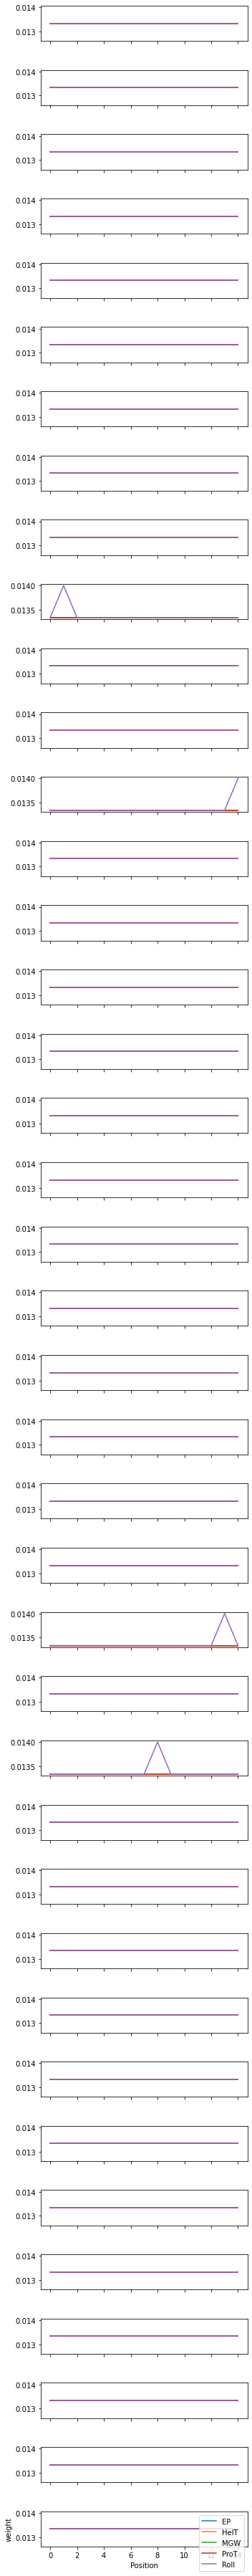

In [73]:
fig,ax = plt.subplots(nrows=len(optim_dict['weights']), sharex=True, figsize=(5,50))

for i,motif in enumerate(optim_dict['weights']):
    for shape_idx in range(motif['weights'].shape[1]):
        these_vals = motif['weights'][:,shape_idx]
        name = param_names[shape_idx]
        ax[i].plot(
            [i for i in range(motif['weights'].shape[0])],
            these_vals,
            label = name
        )
plt.legend()
plt.ylabel("weight")
plt.xlabel("Position")
plt.tight_layout();

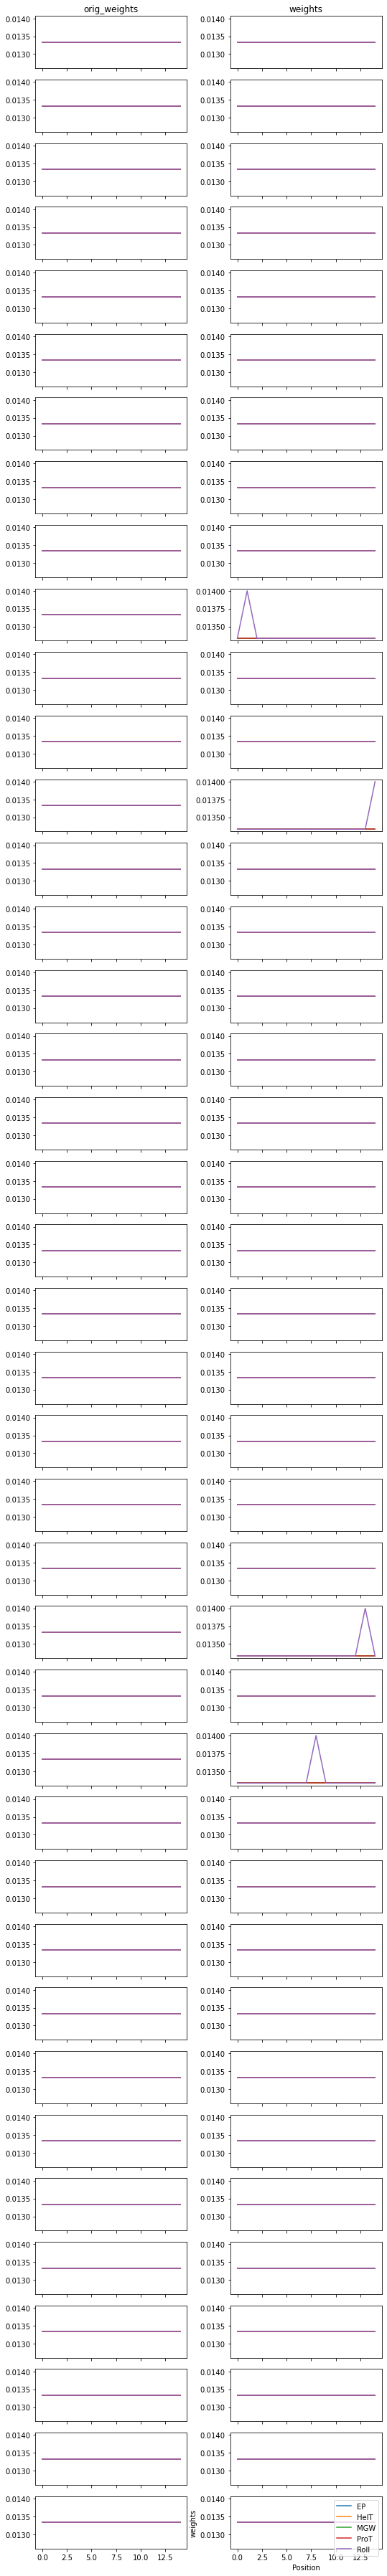

In [74]:
fig,ax = plt.subplots(nrows=len(optim_dict['weights']), ncols=2, sharex=True, figsize=(7.5,50))

for i,motif in enumerate(optim_dict['weights']):
    for j,opt in enumerate(['orig_weights','weights']):
        for shape_idx in range(motif[opt].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
plt.legend()
plt.ylabel("weights")
plt.xlabel("Position")
plt.tight_layout();

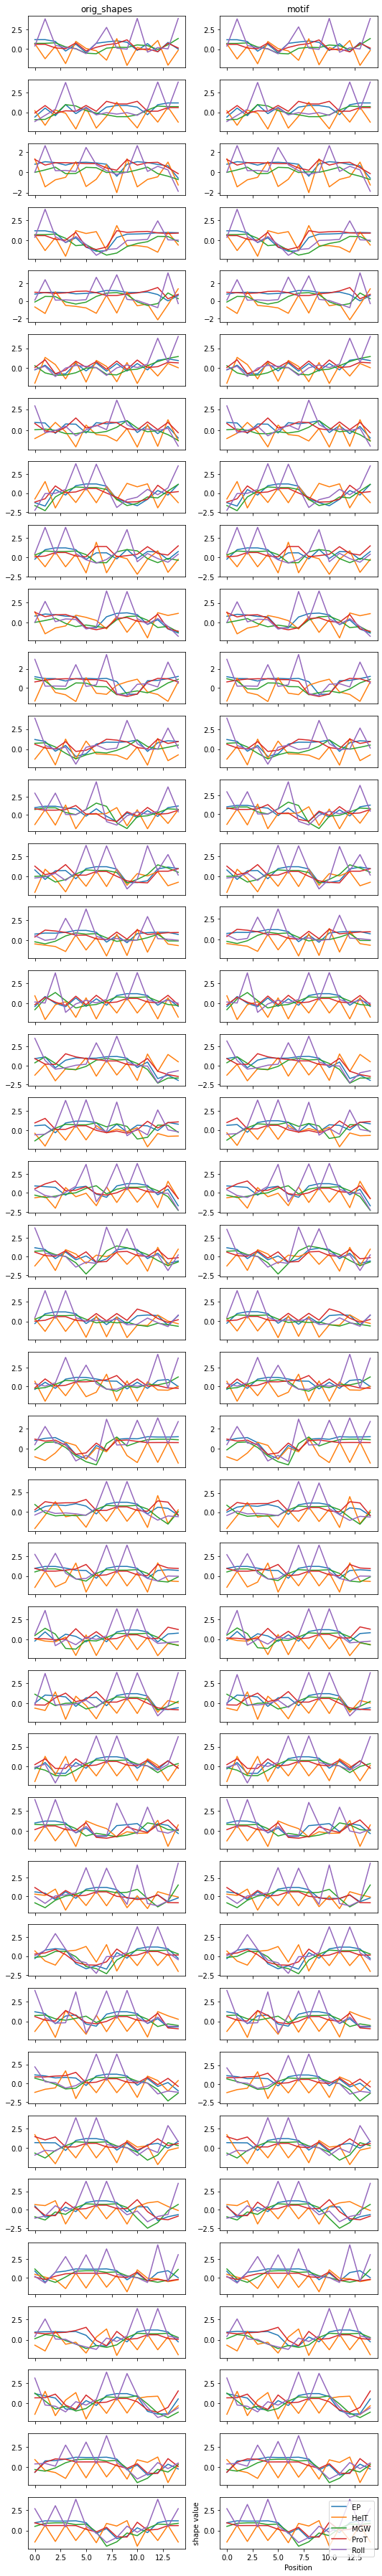

In [75]:
fig,ax = plt.subplots(nrows=len(optim_dict['shapes']), ncols=2, sharex=True, figsize=(7.5,50))

for i,motif in enumerate(optim_dict['shapes']):
    for j,opt in enumerate(['orig_shapes','motif']):
        for shape_idx in range(motif[opt].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
plt.legend()
plt.ylabel("shape value")
plt.xlabel("Position")
plt.tight_layout();

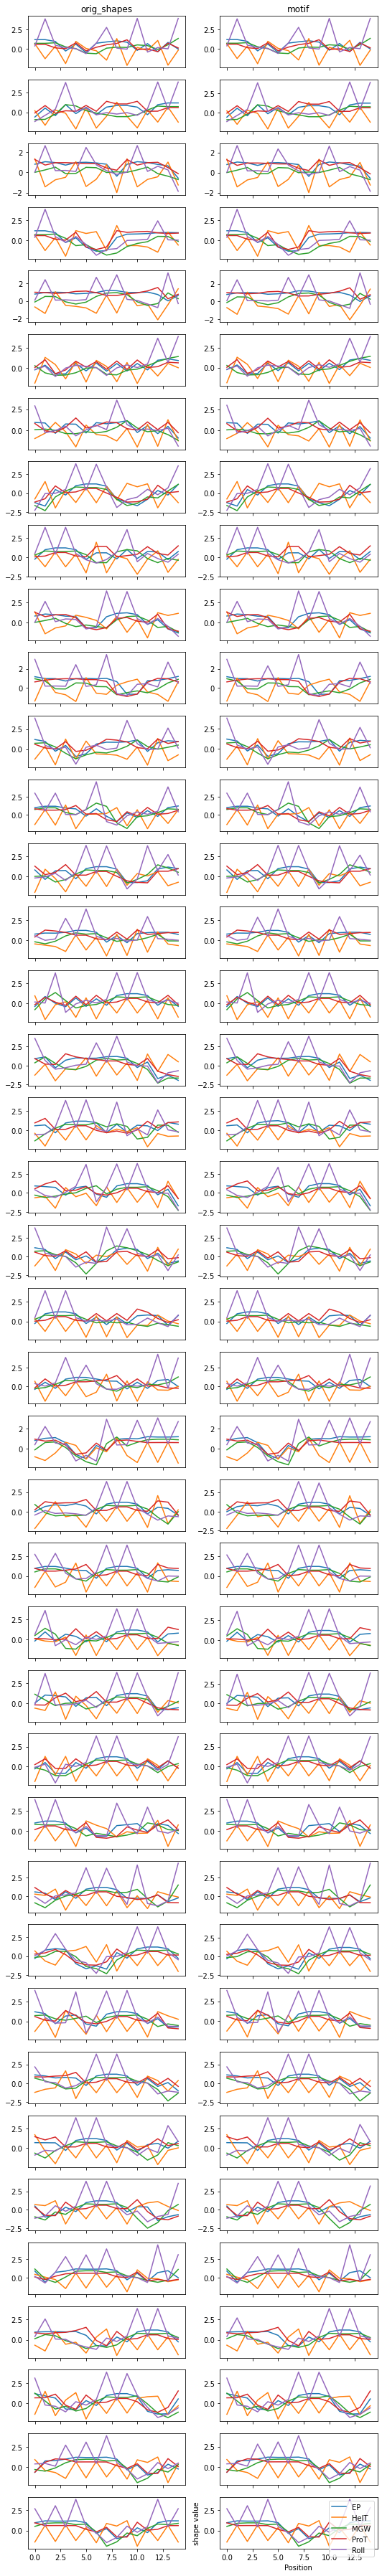

In [76]:
fig,ax = plt.subplots(nrows=len(optim_dict['shapes']), ncols=2, sharex=True, figsize=(7.5,50))

for i,motif in enumerate(optim_dict['shapes and weights']):
    for j,opt in enumerate(['orig_shapes','motif']):
        for shape_idx in range(motif[opt].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
plt.legend()
plt.ylabel("shape value")
plt.xlabel("Position")
plt.tight_layout();

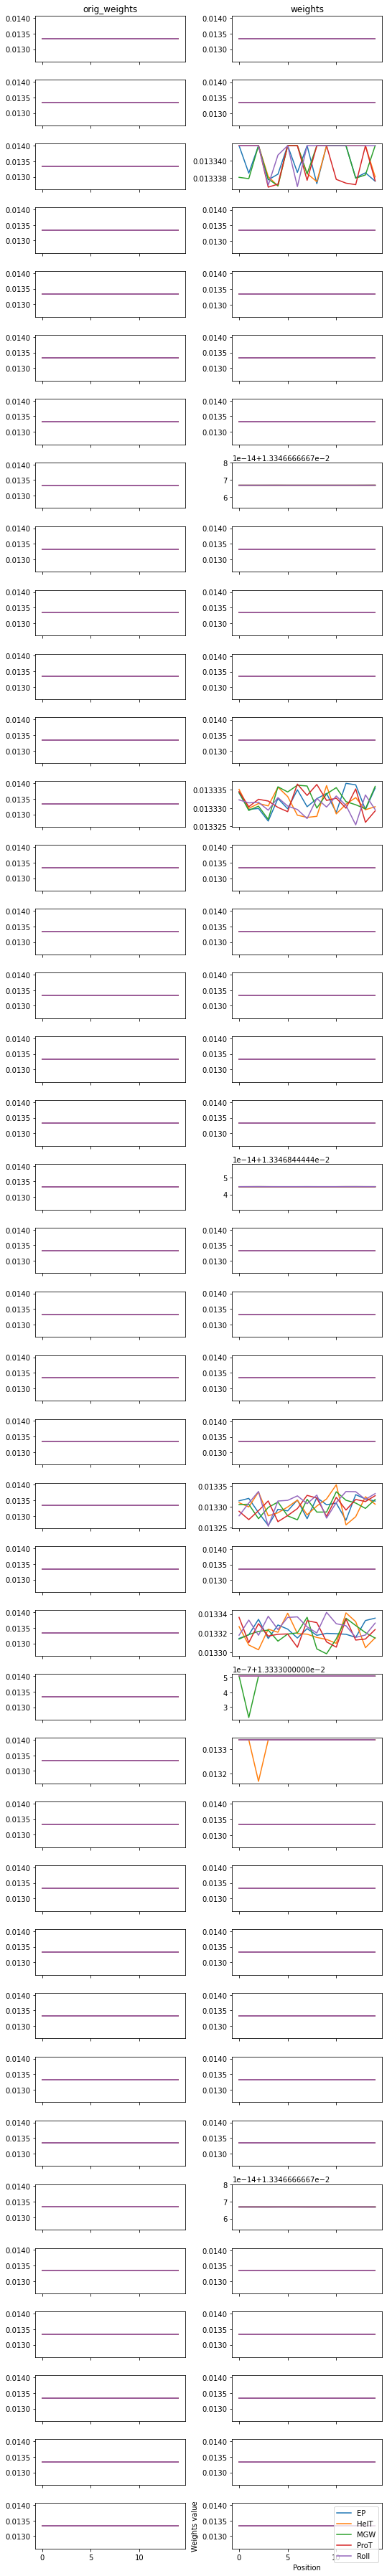

In [77]:
fig,ax = plt.subplots(nrows=len(optim_dict['shapes']), ncols=2, sharex=True, figsize=(7.5,50))

for i,motif in enumerate(optim_dict['shapes and weights']):
    for j,opt in enumerate(['orig_weights','weights']):
        for shape_idx in range(motif['weights'].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
plt.legend()
plt.ylabel("Weights value")
plt.xlabel("Position")
plt.tight_layout();

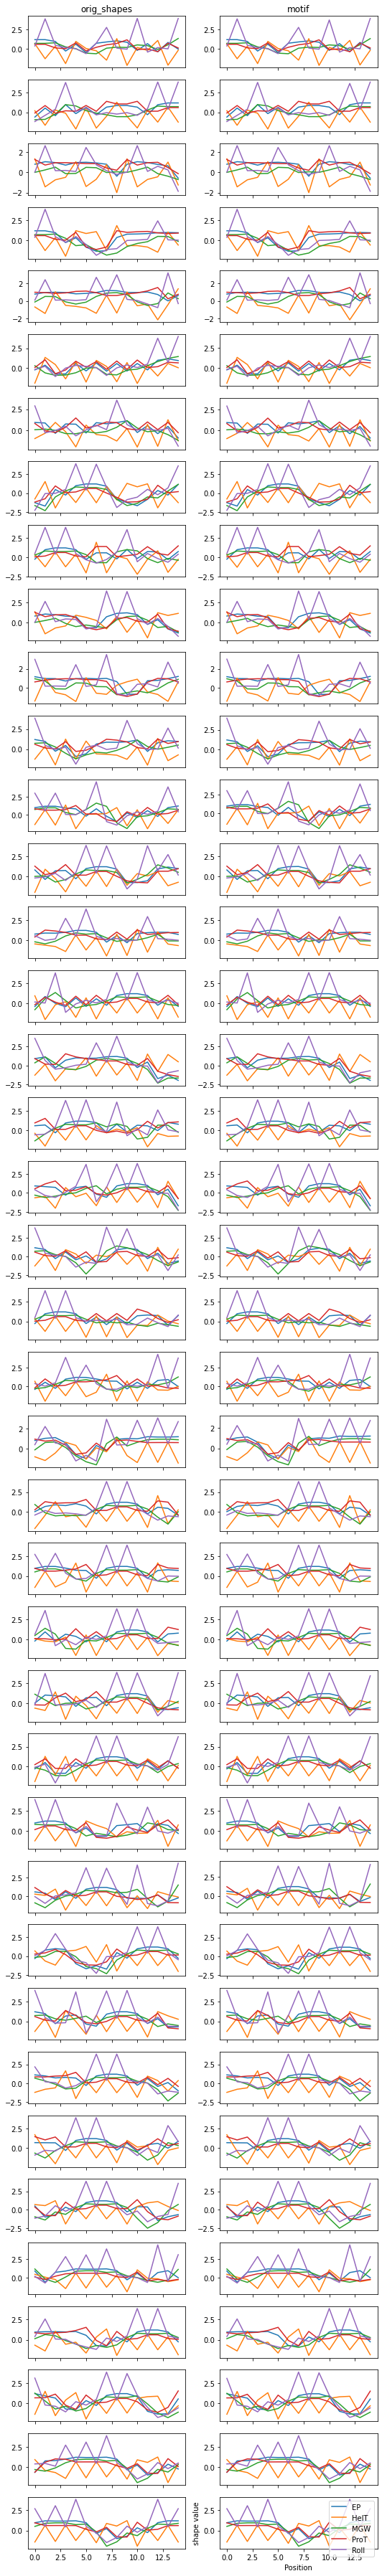

In [78]:
fig,ax = plt.subplots(nrows=len(optim_dict['shapes']), ncols=2, sharex=True, figsize=(7.5,50))

for i,motif in enumerate(optim_dict['shapes weights and threshold']):
    for j,opt in enumerate(['orig_shapes','motif']):
        for shape_idx in range(motif[opt].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
plt.legend()
plt.ylabel("shape value")
plt.xlabel("Position")
plt.tight_layout();

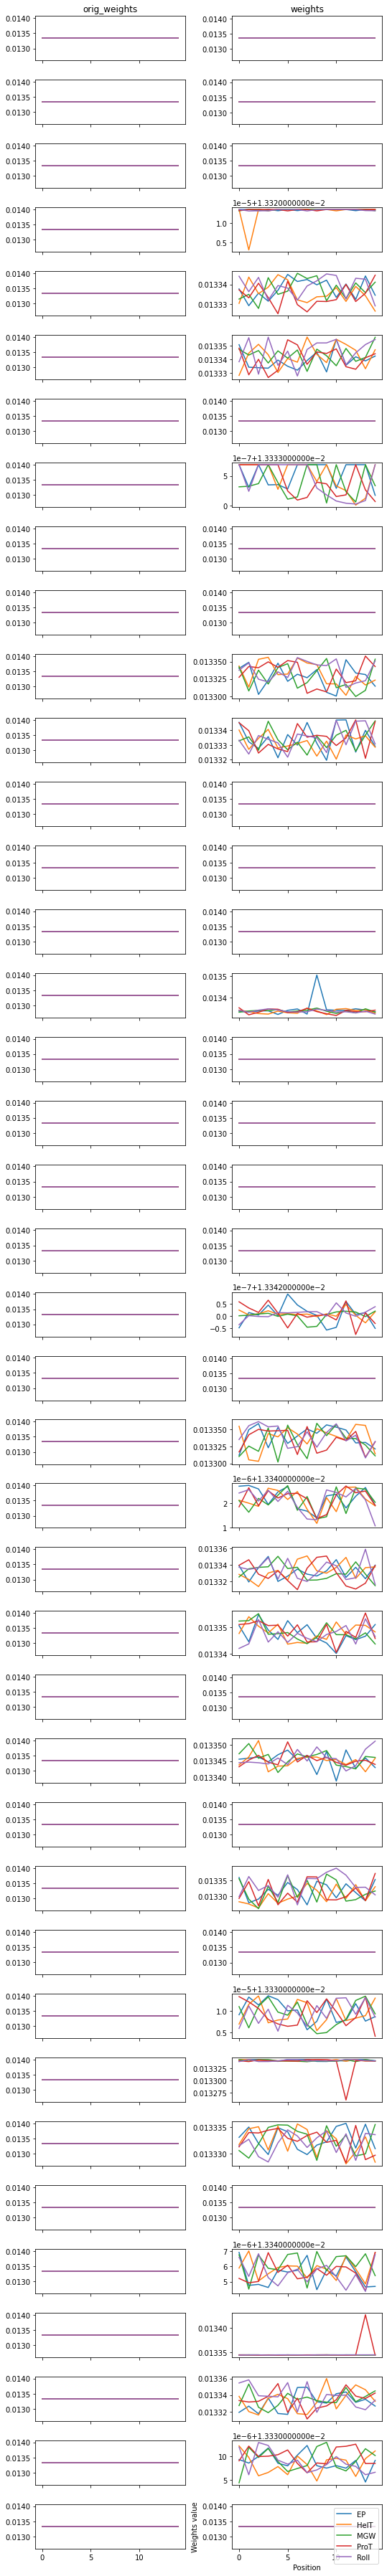

In [79]:
fig,ax = plt.subplots(nrows=len(optim_dict['shapes']), ncols=2, sharex=True, figsize=(7.5,50))

for i,motif in enumerate(optim_dict['shapes weights and threshold']):
    for j,opt in enumerate(['orig_weights','weights']):
        for shape_idx in range(motif['weights'].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
plt.legend()
plt.ylabel("Weights value")
plt.xlabel("Position")
plt.tight_layout();

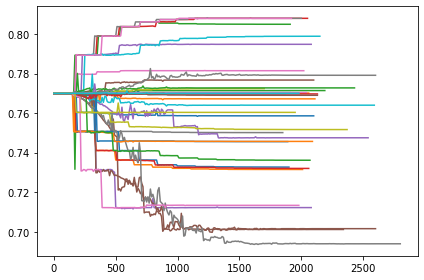

In [80]:
rownum = 1
colnum = 1

fig,ax = plt.subplots(nrows=rownum, ncols=colnum)

for i,optim_res in enumerate(optim_dict['shapes weights and threshold']):
    
    thresh_trace = optim_res['opt_info']['threshold']
    nfeval = optim_res['opt_info']['eval']
    ax.plot(
        nfeval,
        thresh_trace
    )
    
plt.tight_layout()

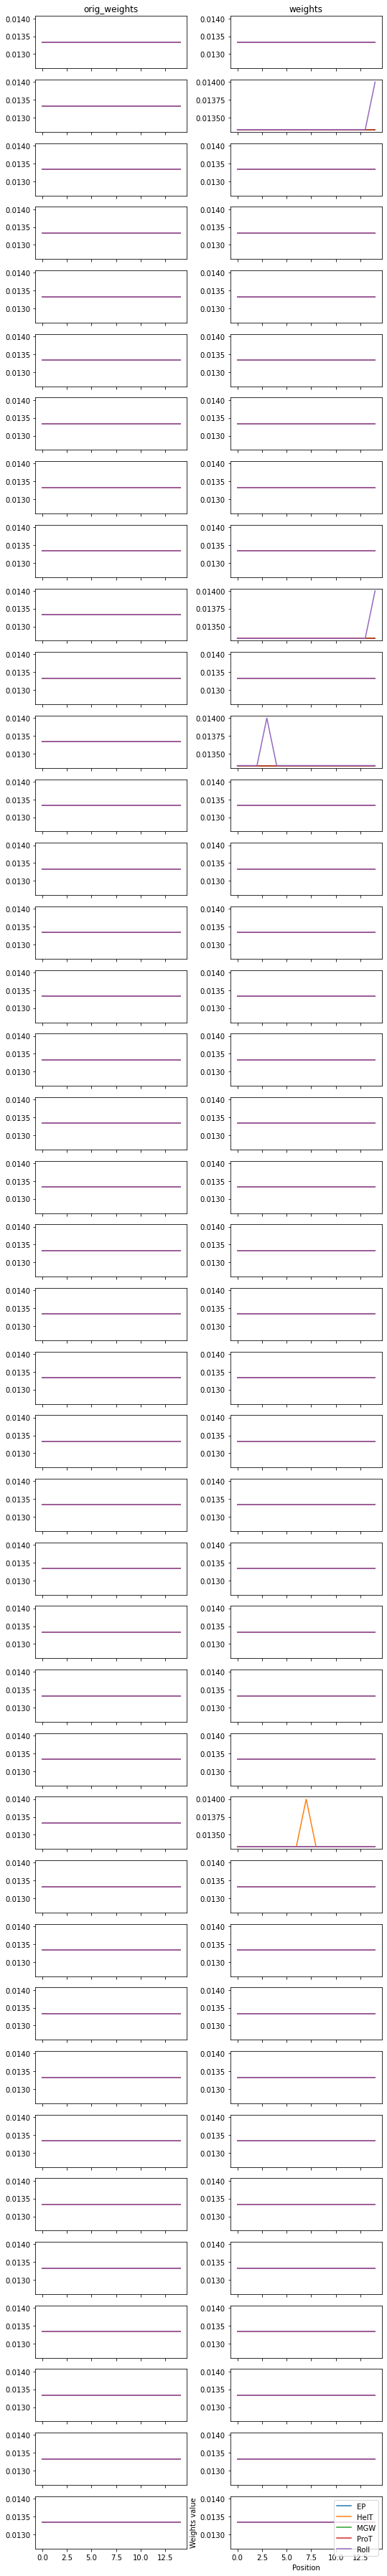

In [81]:
fig,ax = plt.subplots(nrows=len(optim_dict['shapes']), ncols=2, sharex=True, figsize=(7.5,50))

for i,motif in enumerate(optim_dict['adapt weights']):
    for j,opt in enumerate(['orig_weights','weights']):
        for shape_idx in range(motif['weights'].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
plt.legend()
plt.ylabel("Weights value")
plt.xlabel("Position")
plt.tight_layout();

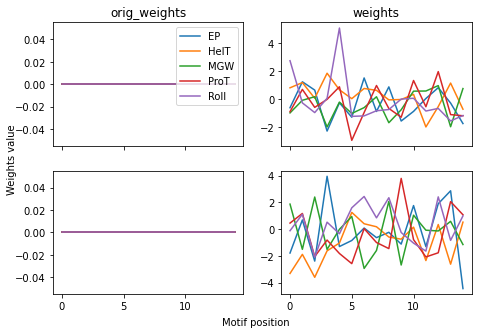

In [82]:
fig,ax = plt.subplots(nrows=len(optim_dict['stochastic weights']), ncols=2, sharex=True, figsize=(7.5,5))

for i,motif in enumerate(optim_dict['stochastic weights']):
    for j,opt in enumerate(['orig_weights','weights']):
        for shape_idx in range(motif['weights'].shape[1]):
            these_vals = motif[opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
ax[0,0].legend()
# plt.ylabel("Weights value")
# plt.xlabel("Position")
fig.text(0.5, 0.04, 'Motif position', ha='center')
fig.text(0.04, 0.5, 'Weights value', va='center', rotation='vertical')
plt.savefig("20210730_stochastic_weights_opt.png")
plt.show();
# plt.tight_layout();

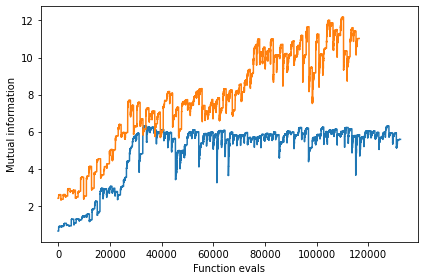

In [83]:
for optim_res in optim_dict['stochastic weights']:

    mi_trace = optim_res['opt_info']['value']
    nfeval = optim_res['opt_info']['eval']
    plt.plot(
        nfeval,
        mi_trace
    )

plt.ylabel("Mutual information")
plt.xlabel("Function evals")
plt.tight_layout()
plt.savefig("20210730_stochastic_weights_MI_opt.png")
plt.show();

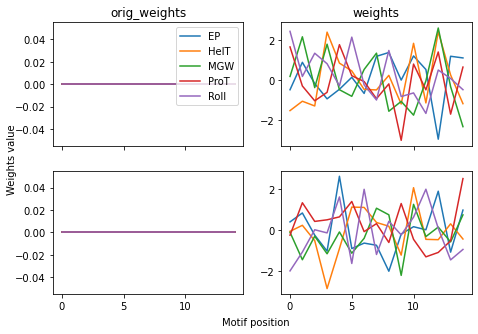

In [84]:
fig,ax = plt.subplots(nrows=len(optim_dict['brent stochastic weights']), ncols=2, sharex=True, figsize=(7.5,5))

for i,motif in enumerate(optim_dict['brent stochastic weights']):
    for j,opt in enumerate(['orig_weights','weights']):
        for shape_idx in range(motif[0]['weights'].shape[1]):
            these_vals = motif[0][opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[0][opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
ax[0,0].legend()
# plt.ylabel("Weights value")
# plt.xlabel("Position")
fig.text(0.5, 0.04, 'Motif position', ha='center')
fig.text(0.04, 0.5, 'Weights value', va='center', rotation='vertical')
plt.savefig("20210803_brent_threshold_stochastic_weights_opt.png")
plt.show();
# plt.tight_layout();

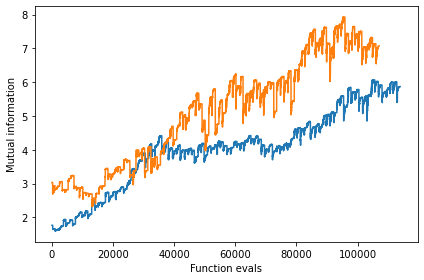

In [85]:
for optim_res in optim_dict['brent stochastic weights']:

    mi_trace = optim_res[0]['opt_info']['value']
    nfeval = optim_res[0]['opt_info']['eval']
    plt.plot(
        nfeval,
        mi_trace
    )

plt.ylabel("Mutual information")
plt.xlabel("Function evals")
plt.tight_layout()
plt.savefig("20210803_brent_threshold_stochastic_weights_MI_opt.png")
plt.show();

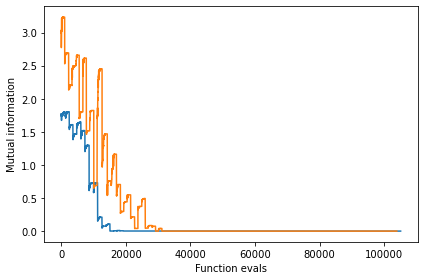

In [103]:
for optim_res in optim_dict['brent stochastic shapes']:

    mi_trace = optim_res[0]['opt_info']['value']
    nfeval = optim_res[0]['opt_info']['eval']
    plt.plot(
        nfeval,
        mi_trace
    )

plt.ylabel("Mutual information")
plt.xlabel("Function evals")
plt.tight_layout()
plt.savefig("20210803_brent_threshold_stochastic_shapes_MI_opt.png")
plt.show();

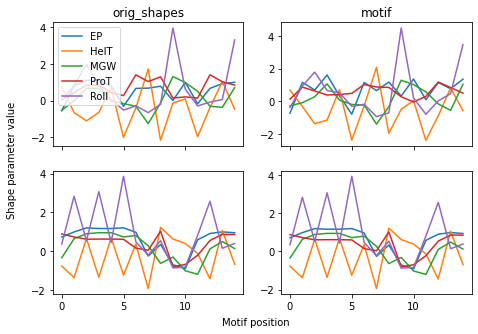

In [104]:
fig,ax = plt.subplots(nrows=len(optim_dict['brent stochastic shapes']), ncols=2, sharex=True, figsize=(7.5,5))

for i,motif in enumerate(optim_dict['brent stochastic shapes']):
    for j,opt in enumerate(['orig_shapes','motif']):
        for shape_idx in range(motif[0]['motif'].shape[1]):
            these_vals = motif[0][opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[0][opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
ax[0,0].legend(loc=2)
# plt.ylabel("Weights value")
# plt.xlabel("Position")
fig.text(0.5, 0.04, 'Motif position', ha='center')
fig.text(0.04, 0.5, 'Shape parameter value', va='center', rotation='vertical')
plt.savefig("20210803_brent_threshold_stochastic_shapes_opt.png")
plt.show();
# plt.tight_layout();

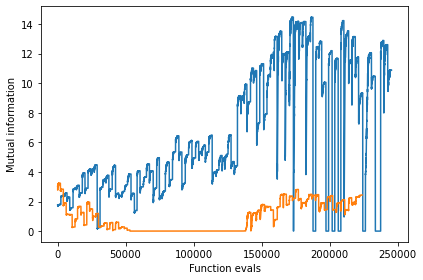

In [105]:
for optim_res in optim_dict['brent stochastic weights shapes']:

    mi_trace = optim_res[0]['opt_info']['value']
    nfeval = optim_res[0]['opt_info']['eval']
    plt.plot(
        nfeval,
        mi_trace
    )

plt.ylabel("Mutual information")
plt.xlabel("Function evals")
plt.tight_layout()
plt.savefig("20210803_brent_threshold_stochastic_weights_shapes_MI_opt.png")
plt.show();

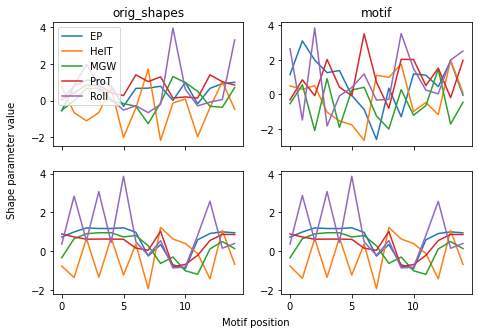

In [107]:
fig,ax = plt.subplots(nrows=len(optim_dict['brent stochastic weights shapes']), ncols=2, sharex=True, figsize=(7.5,5))

for i,motif in enumerate(optim_dict['brent stochastic weights shapes']):
    for j,opt in enumerate(['orig_shapes','motif']):
        for shape_idx in range(motif[0]['motif'].shape[1]):
            these_vals = motif[0][opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[0][opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
ax[0,0].legend(loc=2)
# plt.ylabel("Weights value")
# plt.xlabel("Position")
fig.text(0.5, 0.04, 'Motif position', ha='center')
fig.text(0.04, 0.5, 'Shape parameter value', va='center', rotation='vertical')
plt.savefig("20210803_brent_threshold_stochastic_SHAPES_weights_shapes_opt.png")
plt.show();
# plt.tight_layout();

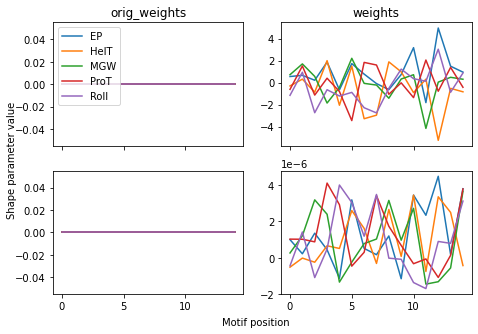

In [108]:
fig,ax = plt.subplots(nrows=len(optim_dict['brent stochastic weights shapes']), ncols=2, sharex=True, figsize=(7.5,5))

for i,motif in enumerate(optim_dict['brent stochastic weights shapes']):
    for j,opt in enumerate(['orig_weights','weights']):
        for shape_idx in range(motif[0]['weights'].shape[1]):
            these_vals = motif[0][opt][:,shape_idx]
            name = param_names[shape_idx]
            ax[i,j].plot(
                [i for i in range(motif[0][opt].shape[0])],
                these_vals,
                label = name
            )
            if i == 0:
                ax[i,j].set_title(opt)
ax[0,0].legend(loc=2)
# plt.ylabel("Weights value")
# plt.xlabel("Position")
fig.text(0.5, 0.04, 'Motif position', ha='center')
fig.text(0.04, 0.5, 'Shape parameter value', va='center', rotation='vertical')
plt.savefig("20210803_brent_threshold_stochastic_WEIGHTS_weights_shapes_opt.png")
plt.show();
# plt.tight_layout();